In [37]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [38]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()
X = wine.data[:, :2]
y = wine.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=48)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=48)

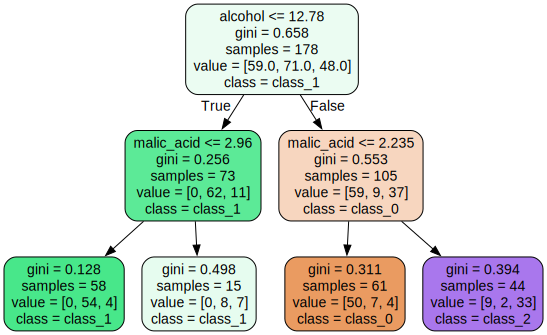

In [39]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="classification_tree.dot",
        feature_names=wine.feature_names[:2],
        class_names=wine.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("classification_tree.dot").render("classification_tree", format="png", cleanup=True)
Source.from_file("classification_tree.dot")

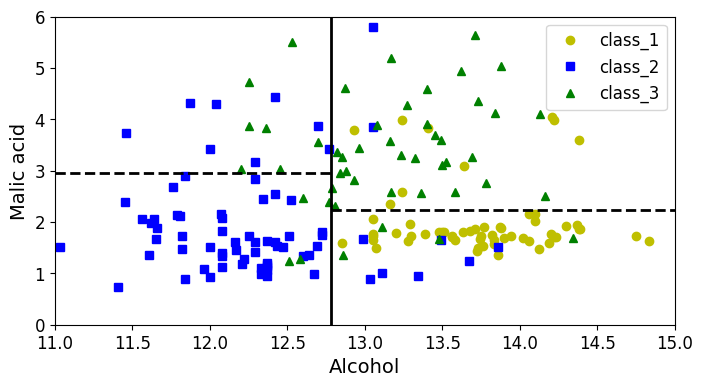

In [40]:
plt.figure(figsize=(8, 4))

plt.ylim(0, 6)
plt.xlim(11, 15)

plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="class_1")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="class_2")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="class_3")
plt.xlabel("Alcohol", fontsize=14)
plt.ylabel("Malic acid", fontsize=14)
plt.legend(fontsize=12)

plt.plot([12.78, 12.78], [0, 6], "k-", linewidth=2)
plt.plot([11, 12.78], [2.96, 2.96], "k--", linewidth=2)
plt.plot([12.78, 15], [2.235, 2.235], "k--", linewidth=2)

plt.show()

In [41]:
tree_clf.predict_proba([[12, 1]])

array([[0.        , 0.93103448, 0.06896552]])

In [42]:
tree_clf.predict([[12, 1]])

array([1])

In [43]:
np.random.seed(48)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=48)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=48)

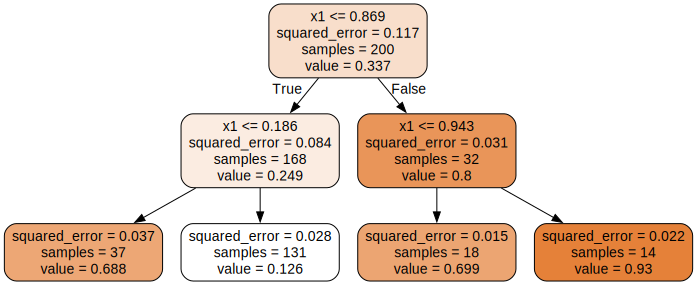

In [45]:
export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file("regression_tree.dot").render("regression_tree", format="png", cleanup=True)
Source.from_file("regression_tree.dot")

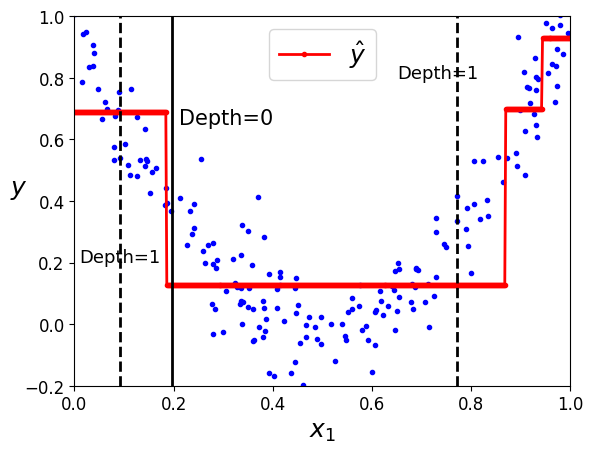

In [46]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plot_regression_predictions(tree_reg, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)

plt.show()